<a href="https://colab.research.google.com/github/Emily-KD/DS200/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction of your dataset. 
I have obtained this dataset from "[www.kaggle.com](https://)". The database I have used is called 'Anime Recommendations Database'. In the original dataset, there are 12292 cases and 7 variables included and is based on the data from the website "[myanimelist.net](https://)" where users can give ratings out of 10. The variable includes the 'anime_id' which is [myanimelist.net](https://)'s unique id identifying an anime, a 'name' variable which is the the title for each anime, a 'genre' variable which lists the genre of each anime, the 'type' variable which shows if it's a tv show or a movie or others, the 'episodes' variable whiere it lists how many episodes are included in each anime(for movies the episode is counted as one), the 'rating' variable which is the rating out of 10 for each anime, and the 'memeber' variable that describes the number of community members that are in this anime's
"group". 

I was interesetd in this database becasue of the attention anime has recently had. Since I am a Japanese person who has a love for anime, I though that it would be insteresting to be able to make a code that can recomend anime based on people's data, and having this as my final project, I think it will bring me a step closer to doing such thing in the future. 

# Description of your research questions.  
Will the rating of anime differ depending on the type of anime(between movie and TV)? 

# Exploratory data analysis. 
From the observed mean there is a differnce between tv anime and movie anime.

I have used teh confidence interval to compare tv anime and movie anime through the boostrap mean. For the TV anime, the 99% confidence interval for the average drop in the population goes from about 6.88 to about 6.97. For the movie anime, the 99% confidence interval for the average drop in the population goes from about 6.25 to about 6.4. Both of the confidence interval doesn't contain 0. By sabtracting both bootsrap means I got a difference of 0.657.

I used the classification method to classify tv anime and movie anime. 

#Conclusions.  
I have set the null hypothesis as the type of anime is unrelated to the rating. My project has revealed that I can reject the null hypothesis. 

#Relevant figures and/or output.  
Throughout your project, all output and figures should support some type of insight about the dataset.  Each should be accompanied by a an explanation in plain language of what it summarizes as well as the insights that may be drawn from it.

In [ ]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from mpl_toolkits.mplot3d import Axes3D
import math
import scipy.stats as stats
path_data = 'http://personal.psu.edu/drh20/200DS/assets/data/'

In [ ]:
from sklearn import neighbors

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/DS200/FinalProject

/content/drive/MyDrive/DS200/FinalProject


In [ ]:
ls

 anime.csv  'Final Project.ipynb'   ratings.csv


In [ ]:
!pip install --upgrade datascience

##Set up

In [ ]:
anime_ori = Table.read_table('anime.csv')
anime_ori

anime_id,name,genre,type,episodes,rating,members
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.16,151266
32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",Movie,1,9.1,72534
15417,Gintama': Enchousen,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,13,9.11,81109


In [ ]:
anime = anime_ori.where('anime_id', are.not_equal_to(None)).where('name', are.not_equal_to(None)).where('genre', are.not_equal_to(None)).where('type', are.not_equal_to(None)).where('episodes', are.not_equal_to(None)).where('episodes', are.not_equal_to('Unknown')).where('genre', are.not_equal_to('Hentai')).where('rating', are.not_equal_to(None)).where('members', are.not_equal_to(None))

In [ ]:
ani_type = anime.select('name', 'type', 'rating')
ani_type

name,type,rating
Kimi no Na wa.,Movie,9.37
Fullmetal Alchemist: Brotherhood,TV,9.26
Gintama°,TV,9.25
Steins;Gate,TV,9.17
Gintama',TV,9.16
Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,TV,9.15
Hunter x Hunter (2011),TV,9.13
Ginga Eiyuu Densetsu,OVA,9.11
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,Movie,9.1
Gintama': Enchousen,TV,9.11


In [ ]:
anime.group('type')

type,count
Movie,2343
Music,487
ONA,612
OVA,2486
Special,1661
TV,3578


In [ ]:
#removing types other than 'Movie' or 'TV'
movie_and_tv = ani_type.where('type', are.not_equal_to('Music')).where('type', are.not_equal_to('ONA')).where('type', are.not_equal_to('OVA')).where('type', are.not_equal_to('Special'))

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:999: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to

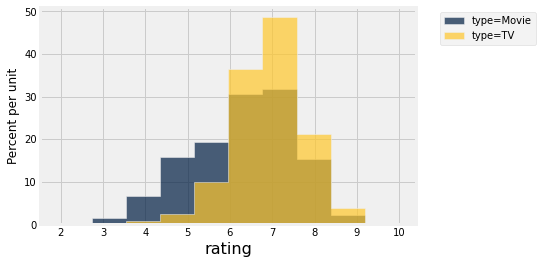

In [ ]:
movie_and_tv.hist('rating', group = 'type')

In [ ]:
means_table = movie_and_tv.where('rating', are.not_equal_to(None)).group('type', np.nanmean)
means_table

type,name nanmean,rating nanmean
Movie,,6.31885
TV,,6.92914


In [ ]:
means = means_table.column(2)
observed_difference = abs(means.item(0) - means.item(1))
observed_difference

0.610293183940243

In [ ]:
def distance(table, group_label):
    reduced = table.select('Result', group_label)
    proportions = reduced.group(group_label, np.average).column(1)
    return abs(proportions.item(1) - proportions.item(0))

In [ ]:
def one_simulated_distance():
    shuffled_labels = bta.sample(with_replacement = False
                                                    ).column('Group')
    shuffled_table = bta.select('Result').with_column(
        'Shuffled Label', shuffled_labels)
    return distance(shuffled_table, 'Shuffled Label') 

In [ ]:
distances = make_array()

repetitions = 20000
for i in np.arange(repetitions):
    new_distance = one_simulated_distance()
    distances = np.append(distances, new_distance)

In [ ]:
empirical_p = np.count_nonzero(distances >= observed_distance) / repetitions
empirical_p

0.0096

There is a difference in the observed mean, so you can tell that there is a difference between the rating of movie anime and tv anime, and in terms of mean, movie has lower mean of ratings. 

#Confidential Interval

##Bootstrap for TV

In [ ]:
def tv_bootstrap_mean():
    resample = anime.where('type', are.equal_to('TV')).sample()
    return np.nanmean(resample.column('rating'))

In [ ]:
# Generate 10,000 bootstrap means
num_repetitions = 10000
bstrap_TV_means = make_array()
for i in np.arange(num_repetitions):
    bstrap_TV_means = np.append(bstrap_TV_means, tv_bootstrap_mean())

In [ ]:
# Get the endpoints of the 99% confidence interval
left = percentile(0.5, bstrap_TV_means)
right = percentile(99.5, bstrap_TV_means)

make_array(left, right)

array([6.89305189, 6.96714206])

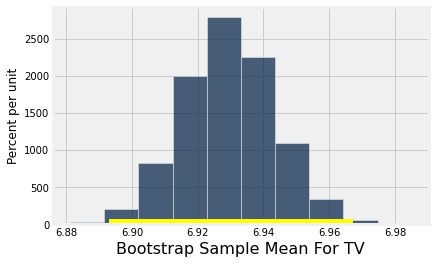

In [ ]:
resampled_means = Table().with_columns(
    'Bootstrap Sample Mean For TV', bstrap_TV_means
)
resampled_means.hist()
plt.plot([left, right], [0, 0], color='yellow', lw=10);

For the TV anime, the 99% confidence interval for the average drop in the population goes from about 6.88 to about 6.97. The interval doesn't contain 0. So I can reject the null hypothesis.

The average drop in the population isn't 0. We can also estimate how big the average drop is.

##Bootstrap for Movie

In [ ]:
def m_bootstrap_mean():
    resample = anime.where('type', are.equal_to('Movie')).sample()
    return np.nanmean(resample.column('rating'))

In [ ]:
# Generate 10,000 bootstrap means
num_repetitions = 10000
bstrap_movie_means = make_array()
for i in np.arange(num_repetitions):
    bstrap_movie_means = np.append(bstrap_movie_means, m_bootstrap_mean())

In [ ]:
# Get the endpoints of the 99% confidence interval
left = percentile(0.5, bstrap_movie_means)
right = percentile(99.5, bstrap_movie_means)

make_array(left, right)

array([6.25260643, 6.38352199])

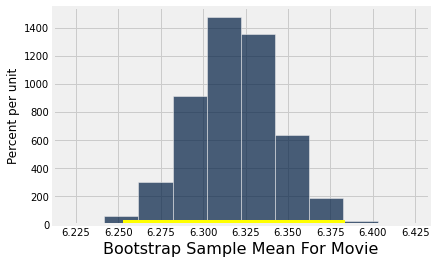

In [ ]:
resampled_means = Table().with_columns(
    'Bootstrap Sample Mean For Movie', bstrap_movie_means
)
resampled_means.hist()
plt.plot([left, right], [0, 0], color='yellow', lw=8);

For the movie anime, the 99% confidence interval for the average drop in the population goes from about 6.25 to about 6.4. The interval doesn't contain 0. So I can reject the null hypothesis.

The average drop in the population isn't 0. We can also estimate how big the average drop is.

In [ ]:
tv_bootstrap_mean() - m_bootstrap_mean()

0.5777477061301379

#Classification

In [ ]:
import matplotlib
matplotlib.use('Agg')
path_data = 'http://personal.psu.edu/drh20/200DS/assets/data/'
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import scipy.stats as stats
plt.style.use('fivethirtyeight')

In [ ]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)

def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

def all_distances(training, new_point):
    attributes = training.drop('Bi_Num_Type')
    def distance_from_point(row):
        return distance(np.array(new_point), np.array(row))
    return attributes.apply(distance_from_point)

def table_with_distances(training, new_point):
    return training.with_column('Distance', all_distances(training, new_point))

def closest(training, new_point, k):
    with_dists = table_with_distances(training, new_point)
    sorted_by_distance = with_dists.sort('Distance')
    topk = sorted_by_distance.take(np.arange(k))
    return topk

def majority(topkclasses):
    ones = topkclasses.where('Bi_Num_Type', are.equal_to(1)).num_rows
    zeros = topkclasses.where('Bi_Num_Type', are.equal_to(0)).num_rows
    if ones > zeros:
        return 1
    else:
        return 0
        

def classify(training, new_point, k):
    closestk = closest(training, new_point, k)
    topkclasses = closestk.select('Bi_Num_Type')
    return majority(topkclasses)

In [ ]:
anime_ori = Table.read_table('anime.csv')

In [ ]:
anime = anime_ori.where('anime_id', are.not_equal_to(None)).where('name', are.not_equal_to(None)).where('genre', are.not_equal_to(None)).where('type', are.not_equal_to(None)).where('episodes', are.not_equal_to(None)).where('episodes', are.not_equal_to('Unknown')).where('genre', are.not_equal_to('Hentai')).where('rating', are.not_equal_to(None)).where('members', are.not_equal_to(None))

In [ ]:
anime_scat = anime.select('name', 'type', 'rating', 'members')
anime_scat

name,type,rating,members
Kimi no Na wa.,Movie,9.37,200630
Fullmetal Alchemist: Brotherhood,TV,9.26,793665
Gintama°,TV,9.25,114262
Steins;Gate,TV,9.17,673572
Gintama',TV,9.16,151266
Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,TV,9.15,93351
Hunter x Hunter (2011),TV,9.13,425855
Ginga Eiyuu Densetsu,OVA,9.11,80679
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,Movie,9.1,72534
Gintama': Enchousen,TV,9.11,81109


In [ ]:
anime_type_scat = anime_scat.where('type', are.not_equal_to('Music')).where('type', are.not_equal_to('ONA')).where('type', are.not_equal_to('OVA')).where('type', are.not_equal_to('Special'))
anime_type_scat

name,type,rating,members
Kimi no Na wa.,Movie,9.37,200630
Fullmetal Alchemist: Brotherhood,TV,9.26,793665
Gintama°,TV,9.25,114262
Steins;Gate,TV,9.17,673572
Gintama',TV,9.16,151266
Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,TV,9.15,93351
Hunter x Hunter (2011),TV,9.13,425855
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,Movie,9.1,72534
Gintama': Enchousen,TV,9.11,81109
Clannad: After Story,TV,9.06,456749


In [ ]:
def is_one(x):
    if x == 'Movie':
        return 1
    else:
        return 0
    
anime_type_scat = anime_type_scat.with_column('Bi_Num_Type', anime_type_scat.apply(is_one, 'type'))

In [ ]:
anime_type_scat

name,type,rating,members,Bi_Num_Type
Kimi no Na wa.,Movie,9.37,200630,1
Fullmetal Alchemist: Brotherhood,TV,9.26,793665,0
Gintama°,TV,9.25,114262,0
Steins;Gate,TV,9.17,673572,0
Gintama',TV,9.16,151266,0
Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,TV,9.15,93351,0
Hunter x Hunter (2011),TV,9.13,425855,0
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,Movie,9.1,72534,1
Gintama': Enchousen,TV,9.11,81109,0
Clannad: After Story,TV,9.06,456749,0


In [ ]:
color_table = Table().with_columns(
    'Bi_Num_Type', make_array(1, 0),
    'Color', make_array('darkblue', 'gold')
)
anime_type_colors = anime_type_scat.join('Bi_Num_Type', color_table)

In [ ]:
def show_closest(point):
    Rating = anime_type_colors.drop('name', 'type', 'Color')
    t = closest(Rating, point, 1)
    x_closest = t.row(0).item(1)
    y_closest = t.row(0).item(2)
    anime_type_colors.scatter('rating', 'members', group='Color')
    plt.scatter(point.item(0), point.item(1), color='red', s=30)
    plt.plot(make_array(point.item(0), x_closest), make_array(point.item(1), y_closest), color='k', lw=2);

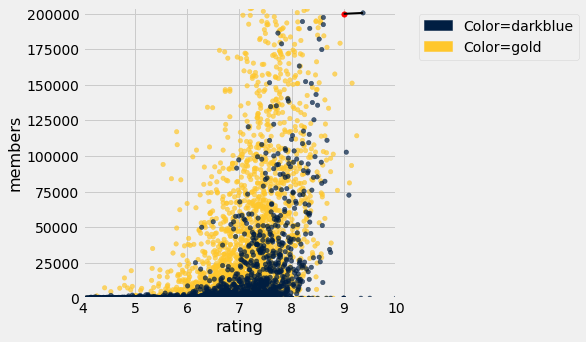

In [ ]:
# In this example, Kimi no Na wa's rating attribute is 9.37 and the amount of users has added this anime to their list is 200630.
KimiNoNaWa = make_array(9.00, 200000)
show_closest(KimiNoNaWa)
plt.xlim(4,10)
plt.ylim(0, 205000);

In [ ]:
x_array = make_array()
y_array = make_array()
for x in np.arange(5, 10, 0.1):
    for y in np.arange(0, 100000, 0.1):
        x_array = np.append(x_array, x)
        y_array = np.append(y_array, y)

test_grid = Table().with_columns(
    'rating', x_array,
    'members', y_array
)

In [ ]:
def classify_grid(training, test, k):
    c = make_array()
    for i in range(test.num_rows):
        # Run the classifier on the ith patient in the test set
        c = np.append(c, classify(training, make_array(test.row(i)), k))   
    return c

In [ ]:
c = classify_grid(anime_type_colors.drop('name', 'type', 'Color'), test_grid, 1)

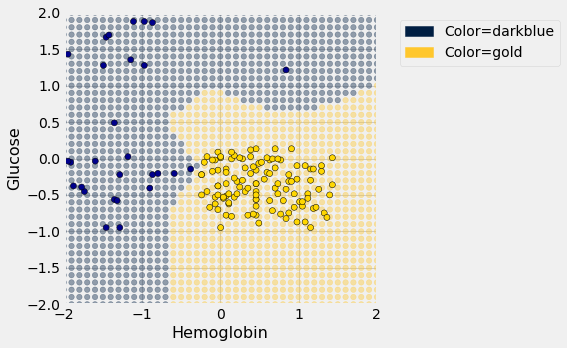

In [ ]:
test_grid = test_grid.with_column('Bi_Num_Type', c).join('Bi_Num_Type', color_table)
test_grid.scatter('rating', 'members', group='Color', alpha=0.4, s=30)

plt.scatter(anime_type_colors.column('rating'), anime_type_colors.column('members'), c=anime_type_colors.column('Color'), edgecolor='k')

plt.xlim(4,10)
plt.ylim(0, 205000);

In [ ]:
shuffled_anime = anime_type_colors.sample(with_replacement=False) 
training_set = shuffled_anime.take(np.arange(2960))
test_set  = shuffled_anime.take(np.arange(2961, 5921))

In [ ]:
def count_zero(array):
    """Counts the number of 0's in an array"""
    return len(array) - np.count_nonzero(array)

def count_equal(array1, array2):
    """Takes two numerical arrays of equal length
    and counts the indices where the two are equal"""
    return count_zero(array1 - array2)

def evaluate_accuracy(training, test, k):
    test_attributes = test.drop('Bi_Num_Type')
    def classify_testrow(row):
        return classify(training, row, k)
    c = test_attributes.apply(classify_testrow)
    return count_equal(c, test.column('Bi_Num_Type')) / test.num_rows

###How it does with arbitrarily using $k=5$.

In [ ]:
evaluate_accuracy(training_set, test_set, 5)

UFuncTypeError: ignored

The accuracy rate isn't bad at all for a simple classifier.

###How it does with arbitrarily using $k=50$.

In [ ]:
evaluate_accuracy(training_set, test_set, 50)

The accuracy rate isn't bad at all for a simple classifier.

###How it does with arbitrarily using $k=100$.

In [ ]:
evaluate_accuracy(training_set, test_set, 100)

The accuracy rate isn't bad at all for a simple classifier.